In [7]:
# reload automatically the modules when they change
%load_ext autoreload
%autoreload 2

# add the current directory to the python search path
import sys
sys.path.insert(0, ".")
sys.path.insert(0, "./src/")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
from scipy import signal
import numpy as np
import pandas as pd
from plot_raw import plot_raw
from matplotlib import pyplot as plt

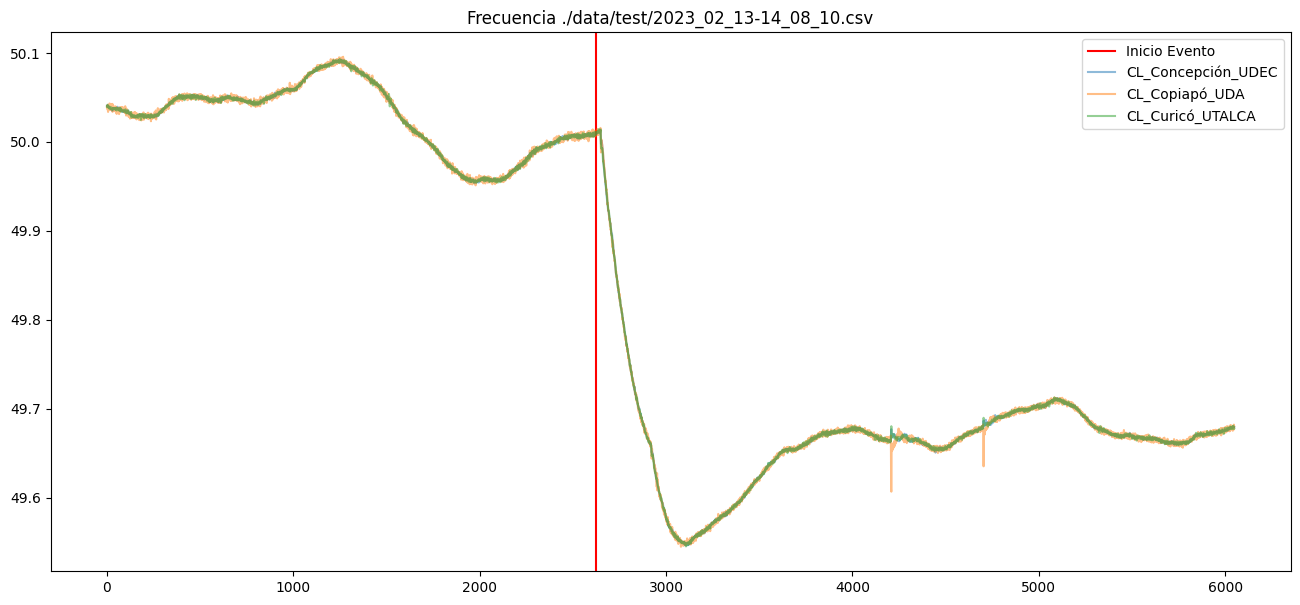

In [3]:
## Ejemplo uso plot_raw

input_path = "./data/test/2023_02_13-14_08_10.csv"
fig = plot_raw(input_path)

In [63]:
## EJemplo uso scipy.optimize.differential_evolution y plot_result
from sampler import sampler
from scipy.optimize import differential_evolution
from objective_function import objective_function

#input_path = "./data/raw/2021_set_n1/2021_05_02-16_44_00.csv"
input_path = "./data/raw/2021_set_n1/2021_06_19-09_04_00.csv"

model = 1
Ts = 0.3
df = sampler(input_path, Ts, event_time=25)
P0 = df["power"][0] / 1000


event_freq = df["freq"][df["event"]==1].to_numpy()

bounds = [(0.00001, 1000) for i in range(6)]
arguments = (model, Ts, P0, event_freq)

obj_fun_vavues = []
best_x_iterk = []
conv_prop_iterk = []
def callback(xk, convergence):
    obj_fun_vavues.append(objective_function(xk, arguments))
    best_x_iterk.append(xk)
    conv_prop_iterk.append(convergence)

tol = 0.01
popsize = 30
mutation = (0.5, 1.5)
recombination = 0.6

result = differential_evolution(
    objective_function, 
    bounds, 
    args = (arguments,), 
    callback = callback,
    popsize = popsize, 
    tol = tol, 
    mutation = mutation, 
    recombination = recombination
)

result

 message: Optimization terminated successfully.
 success: True
     fun: 0.4020006806363193
       x: [ 1.566e+00  1.000e-05  5.679e+02  2.334e+02  2.938e+02
            1.000e-05]
     nit: 176
    nfev: 31958
     jac: [ 1.965e-05  1.560e-02  0.000e+00  0.000e+00 -6.272e-05
            3.851e+00]

Text(50, 0.5, 'model = 1\nTs = 0.3\n\ntol = 0.01\npopsize = 30\nmutation = (0.5, 1.5)\nrecombination = 0.6')

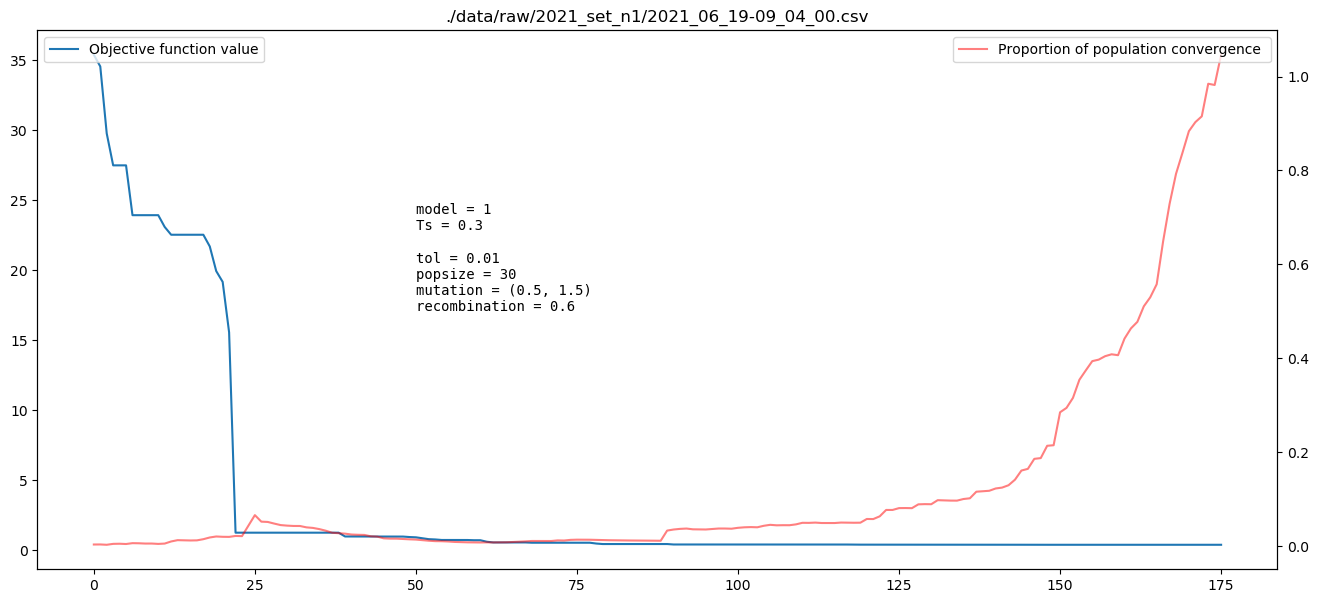

In [76]:
fig_size = (16, 7)
fig, ax1 = plt.subplots(figsize=fig_size)

ax1.plot(obj_fun_vavues, label = "Objective function value")
ax2 = ax1.twinx()
ax2.plot(conv_prop_iterk, color = 'red', alpha = .5, label = "Proportion of population convergence ")
ax1.legend(loc =  'upper left')
ax2.legend(loc = 'upper right')
plt.title(input_path)
ax2.text(50, .5, f"model = {model}\nTs = {Ts}\n\ntol = {tol}\npopsize = {popsize}\nmutation = {mutation}\nrecombination = {recombination}", fontsize=10, fontfamily='monospace' )


Text(0.5, 1.0, './data/raw/2021_set_n1/2021_06_19-09_04_00.csv')

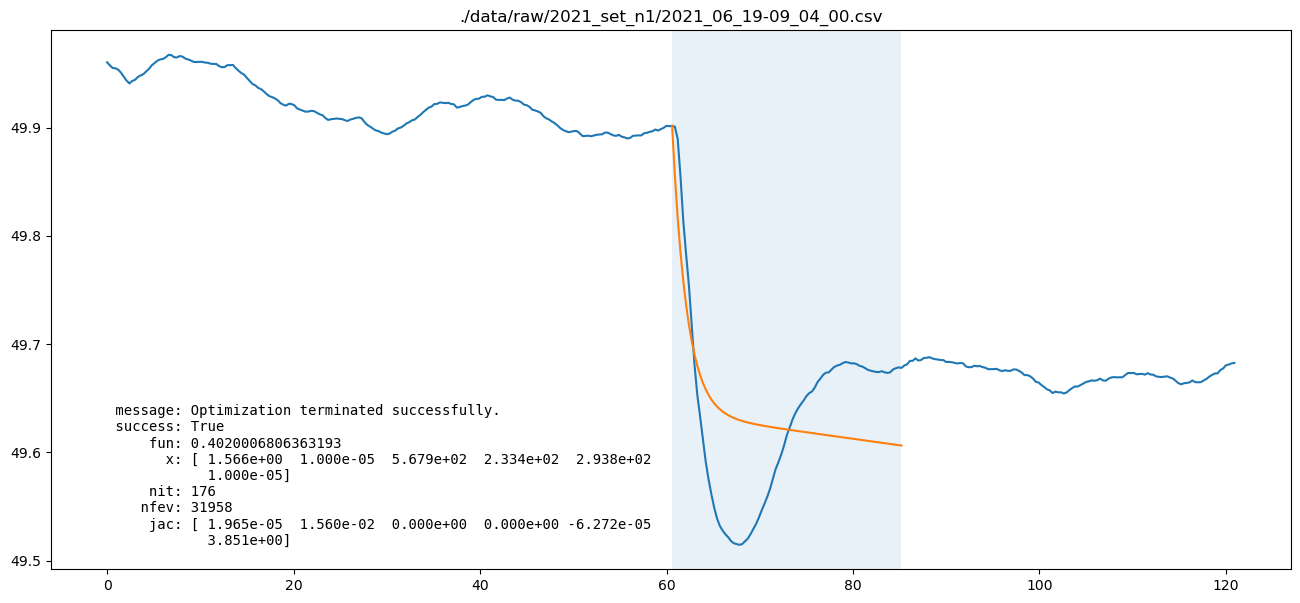

In [65]:
from plot_result import plot_result
fig = plot_result(df, arguments, result.x)
plt.text(0, min(event_freq), repr(result), fontsize=10, fontfamily='monospace' )
plt.title(input_path)

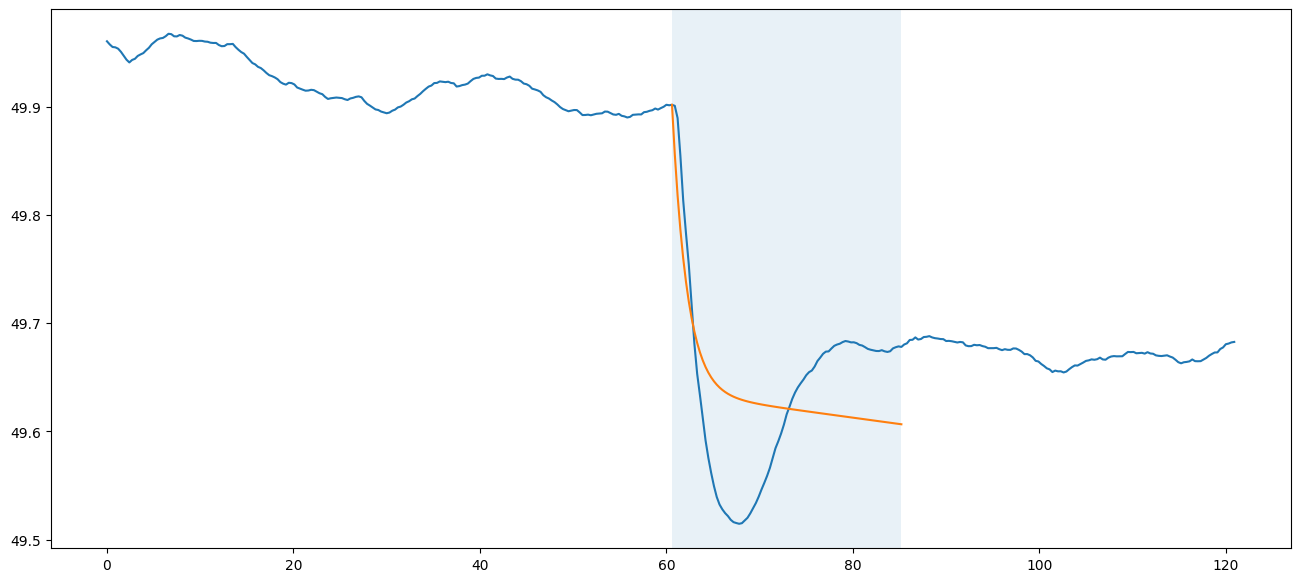

In [6]:
from objective_function import modelo_1

fig_size = (16, 7)
sys = modelo_1(result.x, Ts)
        
sim_power = P0 * np.repeat(1, event_freq.shape)
sim = signal.dlsim(sys, sim_power, x0 = event_freq[0])
sim_freq = sim[1].ravel()
    
real_time = df["time"].to_numpy()
real_freq = df["freq"].to_numpy()
event_time = df["time"][df["event"]==1].to_numpy()
sim_time = np.arange(event_time[0],event_time[-1],Ts)

fig = plt.figure(figsize=fig_size)
    
plt.plot(real_time,real_freq)
plt.axvspan(event_time.min(),event_time.max(), alpha=.1)
plt.plot(sim_time,sim[1])

In [9]:
sim_time.size

83

In [10]:
# Ejemplo uso objective_function
from src.objective_function import objective_function

Kd = 1.479
K = 5.105
Ta = 0.0001
Tb = 0.0001
Tc = 7.652
Td = 1.977
params = [Ta,Tb,Tc,Td,K,Kd]

model =1
Ts = 0.1

input_path = "./data/test/2023_02_13-14_08_10_Sampling_100ms.csv"
df = pd.read_csv(input_path)
event_freq = df["Frecuencia [Hz]"][df["Evento"]==1].to_numpy()

P0 = df["Potencia [MW]"][0]/1000

args = (model, Ts, P0, event_freq)

objective_function(params, args)

428159.742116734


428159.742116734